In [37]:
### Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

### **Loading Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [38]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [39]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [40]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [41]:
df.shape

(100000, 9)

### **Explanation of Features**

1. Gender: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
2. Age: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
3. Hypertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.
4. Heart_disease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.
5. Smoking_history: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.
6. bmi: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes.
7. HbA1c_level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes.
8. Blood_glucose_level: Blood glucose level refers to the amount of glucose in the bloodstream at a given time.
9. Diabetes: Diabetes is the target variable being predicted.




### **EDA**

In [42]:
### General Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [43]:
### Checking for nulls

nulls_df = df.isnull().sum().reset_index()
nulls_df

,index,0
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,smoking_history,0
5,bmi,0
6,HbA1c_level,0
7,blood_glucose_level,0
8,diabetes,0


In [44]:
### Statistics summary

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [45]:
### Checking for duplicates

duplicates = df[df.duplicated()]
duplicates.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
4106,Female,51.0,0,0,No Info,27.32,6.6,200,0
4128,Female,80.0,0,0,never,27.32,5.7,85,0
4224,Male,80.0,1,0,former,27.32,6.2,130,0
4263,Male,80.0,0,0,No Info,27.32,6.0,100,0
4486,Male,50.0,0,0,No Info,27.32,4.8,155,0


In [46]:
### Checking unique values in columns

for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")

Unique values in 'gender': ['Female' 'Male' 'Other']

Unique values in 'age': [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]

Unique values in 'hypertension': [0 1]

Unique values in 'heart_disease': [1 0]

Unique values in 'smoking_history': ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Unique values in 'bmi': [25.19 27.32 23.45 ... 59.42 44.39 60.52]

Unique values in 'HbA1c_level': [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8

### **Data Cleaning**

In [47]:
### Removing uneccesary values in Age Column

df['age'] = df['age'].apply(lambda x: round(x) if x >= 1 else None)
df = df.dropna(subset=['age'])  ### Drop rows where 'age' is NaN
df['age'] = df['age'].astype(int)  ### Convert to integer type

<ipython-input-47-a41c1e68f631>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)  ### Convert to integer type


In [48]:
df['age'].unique()

array([80, 54, 28, 36, 76, 20, 44, 79, 42, 32, 53, 78, 67, 15, 37, 40,  5,
       69, 72,  4, 30, 45, 43, 50, 41, 26, 34, 73, 77, 66, 29, 60, 38,  3,
       57, 74, 19, 46, 21, 59, 27, 13, 56,  2,  7, 11,  6, 55,  9, 62, 47,
       12, 68, 75, 22, 58, 18, 24, 17, 25, 33, 16, 61, 31,  8, 49, 39, 65,
       14, 70, 48, 51, 71, 64, 63, 52, 10, 35, 23,  1])

In [49]:
### Removing uneccesary values in Gender Column

df = df[df['gender'] != 'Other']

In [50]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [51]:
### Function to classify smoking history
def categorize_smoking(status):
    if status in ['never', 'No Info']:
        return 'non smoker'
    elif status in ['former', 'not current', 'ever']:
        return 'past smoker'
    elif status == 'current':
        return 'current smoker'

### Apply the function to the 'smoking_history' column

df['smoking_history'] = df['smoking_history'].apply(categorize_smoking)

In [52]:
df['smoking_history'].unique()

array(['non smoker', 'current smoker', 'past smoker'], dtype=object)

In [53]:
df.shape

(99071, 9)

### **Univariate Analysis**

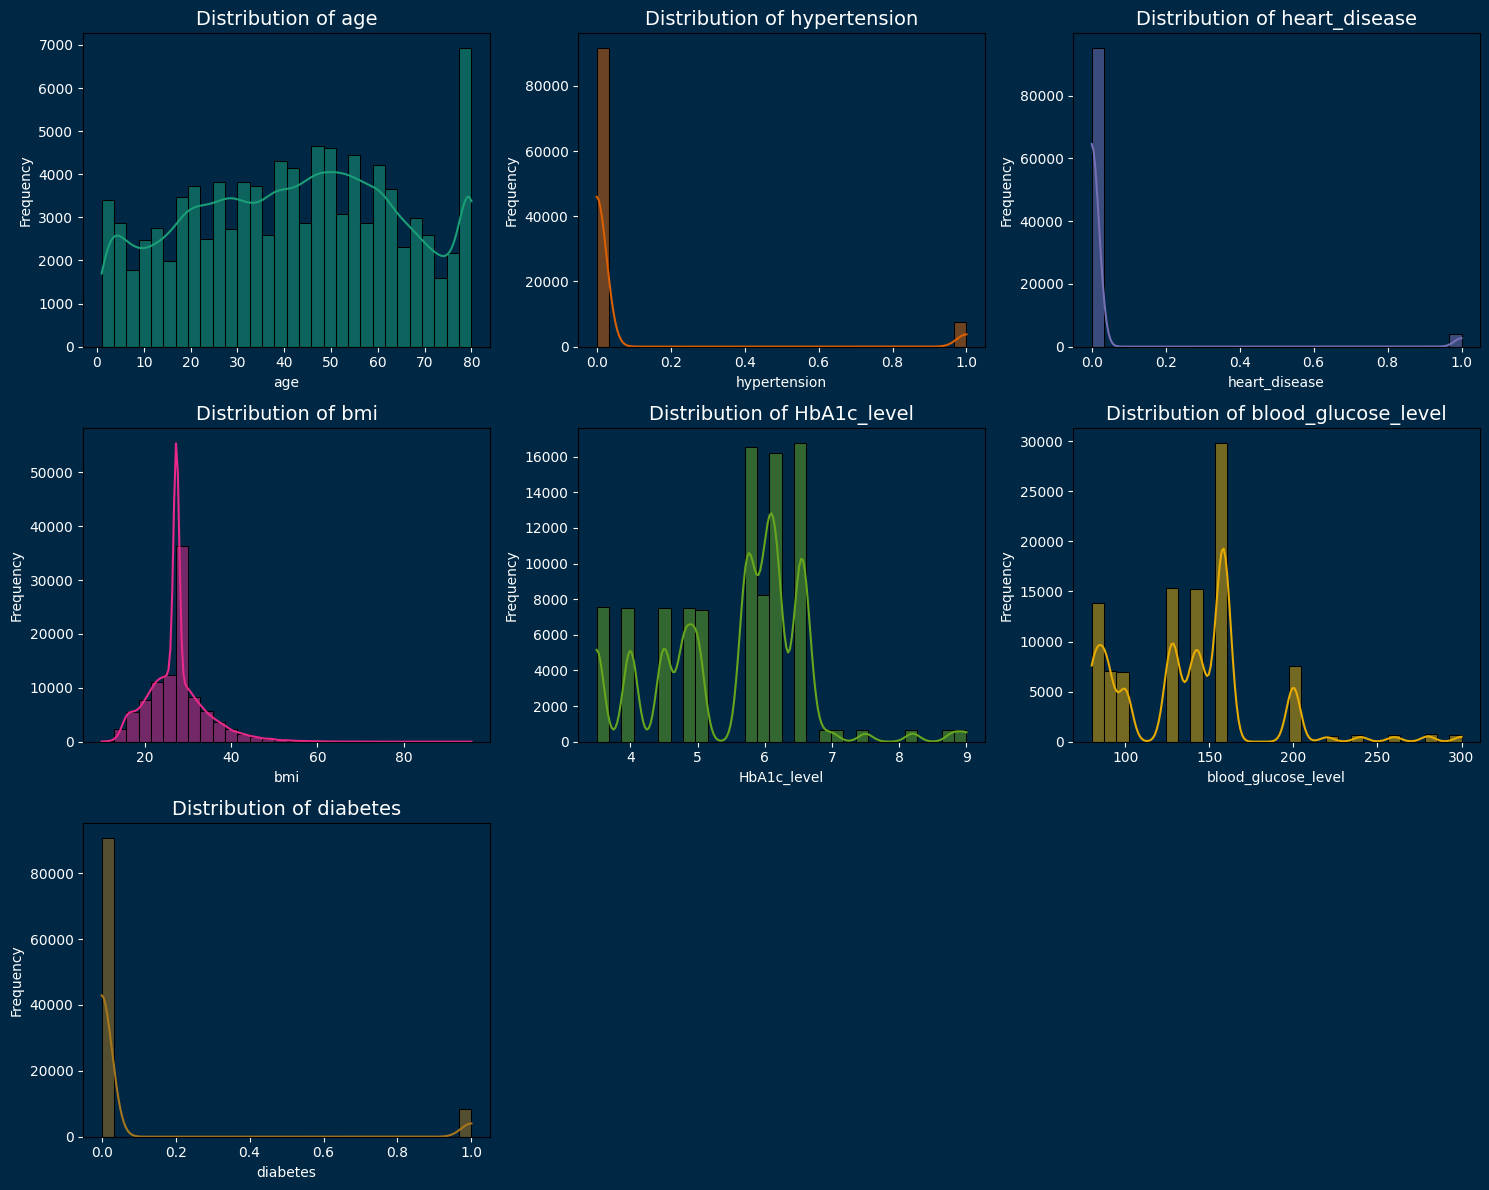

In [54]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

# Set figure background color
fig.patch.set_facecolor('#002845')

palette = plt.cm.Dark2

for i, col in enumerate(numerical_cols):
    sb.histplot(df[col], kde=True, bins=30, color=palette(i / len(numerical_cols)), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", color='white', fontsize=14)  # White title
    axes[i].set_xlabel(col, color='white')
    axes[i].set_ylabel("Frequency", color='white')
    axes[i].tick_params(axis='both', colors='white')

    axes[i].set_facecolor('#002845')

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout for tightness
plt.tight_layout()
plt.show()

1. Right-skewed (positively skewed): Hypertension, heart disease, BMI, HbA1clevel, blood glucose level, diabetes.

2. Approximately uniform: Age.

3. Multimodal: HbA1c level and blood glucose level (but still slightly right-skewed)

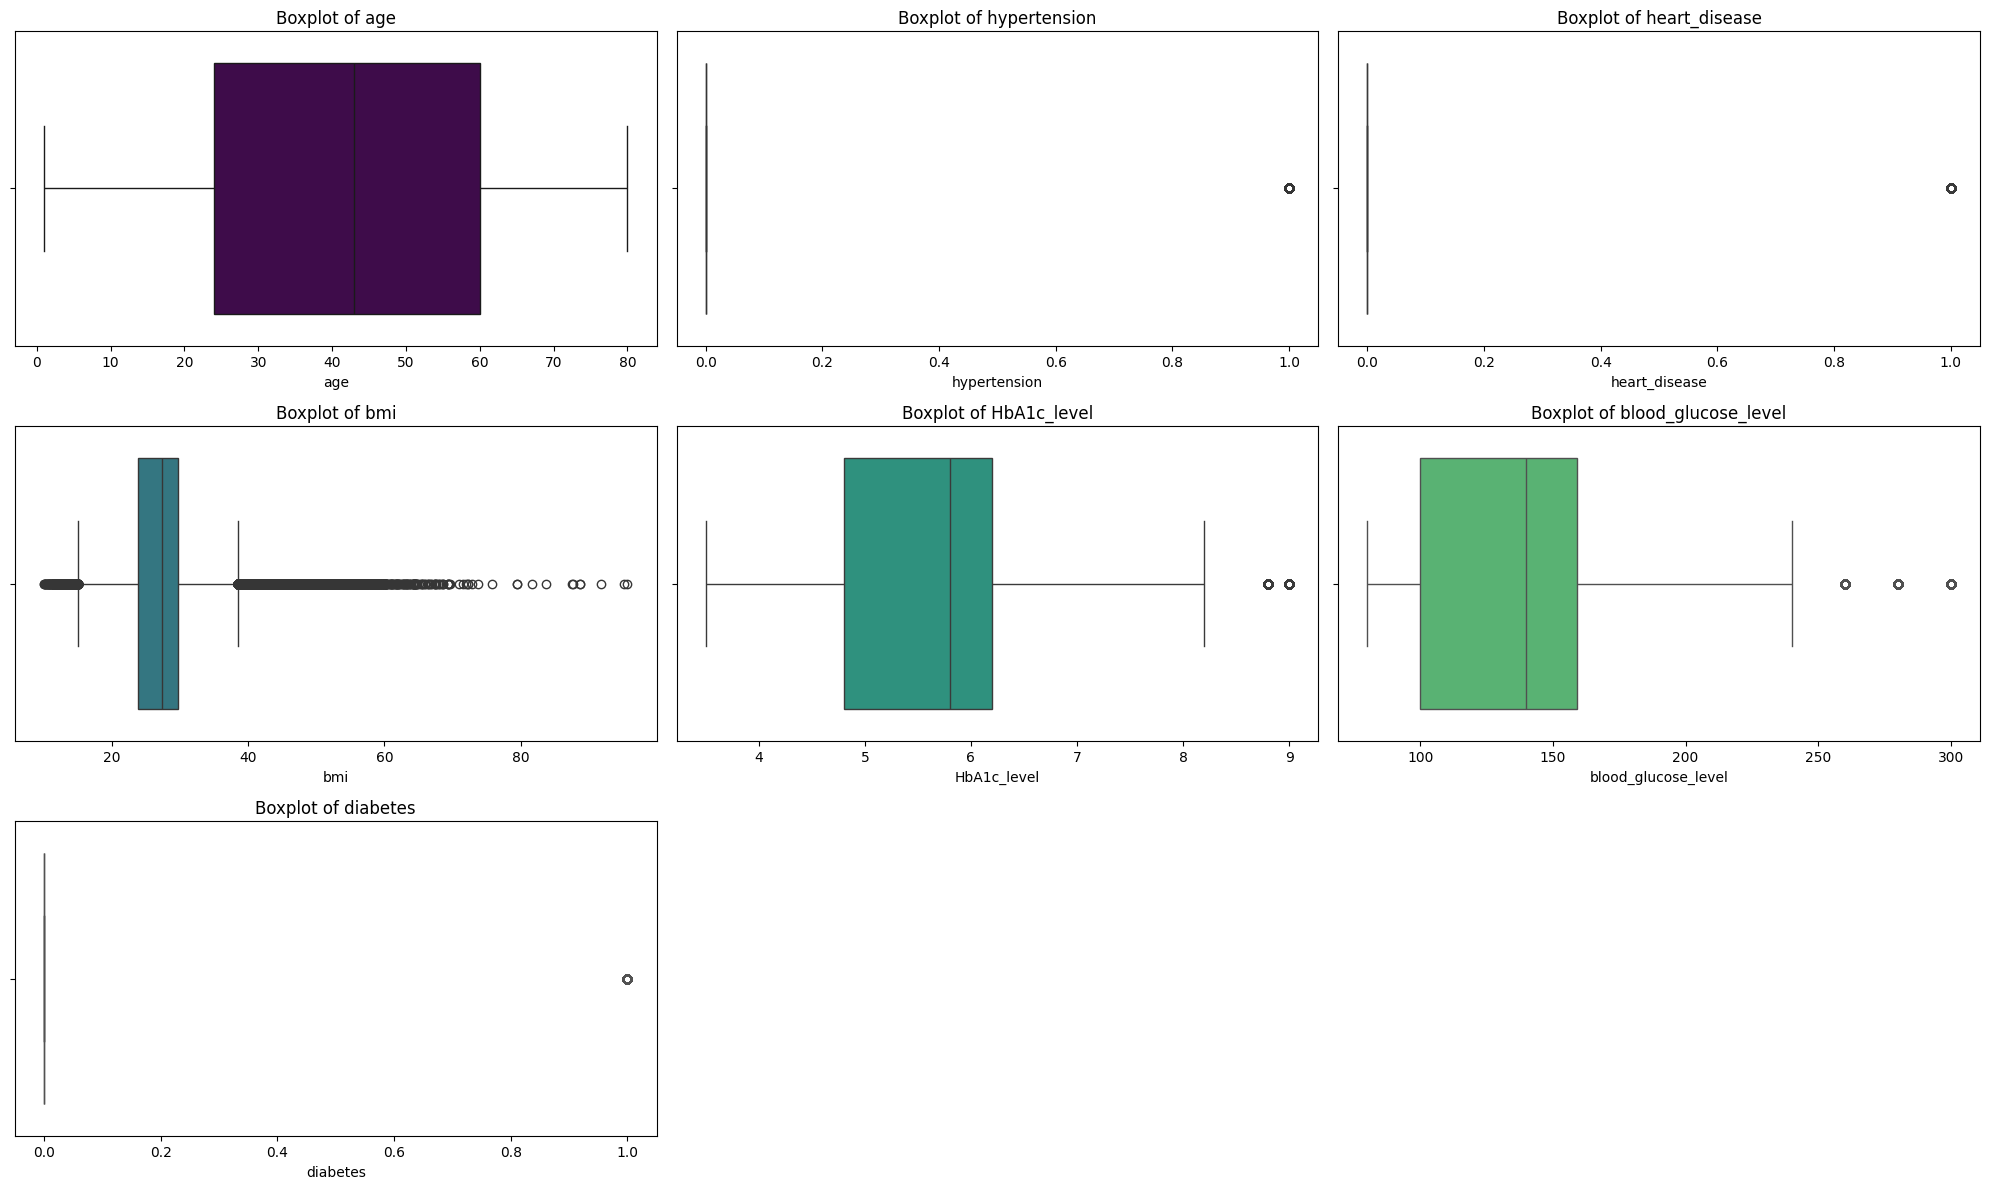

In [56]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

palette = plt.cm.viridis

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sb.boxplot(x=df[col], color=palette(i / len(numerical_cols)), ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The boxplot for diabetes, hypertension and heart_disease are almost a straight line with a single outlier, indicating that is likely a binary variable. Boxplot of BMI (Body Mass Index) is relatively small, indicating that most BMI values are concentrated in a narrow range. Boxplot of HbA1c Level, the median (Q2) is near the center of the box, suggesting a fairly symmetrical distribution. A few outliers are present on the higher side. Boxplot of Blood Glucose Level is wider than the others, indicating a higher spread in glucose levels. A few outliers exist on the higher end.


### **Bivariate Anzalysis**

In [57]:
from sklearn.preprocessing import LabelEncoder

### Convert 'gender' to numerical values

label_encoder = LabelEncoder()
df['gender_status'] = label_encoder.fit_transform(df['gender'])  ### Female -> 0, Male -> 1

In [58]:
### Reclassify smoking_history into three categories

smoking_mapping = {
    'non smoker': 0,
    'past smoker': 1,
    'current smoker': 2
}

### Apply the mapping

df['smoking_history_status'] = df['smoking_history'].map(smoking_mapping)

In [59]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_status,smoking_history_status
0,Female,80,0,1,non smoker,25.19,6.6,140,0,0,0
1,Female,54,0,0,non smoker,27.32,6.6,80,0,0,0
2,Male,28,0,0,non smoker,27.32,5.7,158,0,1,0
3,Female,36,0,0,current smoker,23.45,5.0,155,0,0,2
4,Male,76,1,1,current smoker,20.14,4.8,155,0,1,2


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99071 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  99071 non-null  object 
 1   age                     99071 non-null  int64  
 2   hypertension            99071 non-null  int64  
 3   heart_disease           99071 non-null  int64  
 4   smoking_history         99071 non-null  object 
 5   bmi                     99071 non-null  float64
 6   HbA1c_level             99071 non-null  float64
 7   blood_glucose_level     99071 non-null  int64  
 8   diabetes                99071 non-null  int64  
 9   gender_status           99071 non-null  int64  
 10  smoking_history_status  99071 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 9.1+ MB


In [61]:
### Select only numeric columns

numeric_df = df.select_dtypes(include=['number'])

### Compute correlation matrix

df_corr = numeric_df.corr()
df_corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_status,smoking_history_status
age,1.000000,0.250363,0.233624,0.320676,0.100595,0.110650,0.256975,-0.027143,0.163300
hypertension,0.250363,1.000000,0.120790,0.145545,0.080875,0.084415,0.197171,0.015047,0.059381
heart_disease,0.233624,0.120790,1.000000,0.059115,0.067576,0.070080,0.171255,0.078706,0.063777
bmi,0.320676,0.145545,0.059115,1.000000,0.082029,0.090973,0.212813,-0.020844,0.118096
HbA1c_level,0.100595,0.080875,0.067576,0.082029,1.000000,0.168179,0.402032,0.020867,0.028073
blood_glucose_level,0.110650,0.084415,0.070080,0.090973,0.168179,1.000000,0.420785,0.017640,0.034106
diabetes,0.256975,0.197171,0.171255,0.212813,0.402032,0.420785,1.000000,0.038456,0.075061
gender_status,-0.027143,0.015047,0.078706,-0.020844,0.020867,0.017640,0.038456,1.000000,0.046033
smoking_history_status,0.163300,0.059381,0.063777,0.118096,0.028073,0.034106,0.075061,0.046033,1.000000


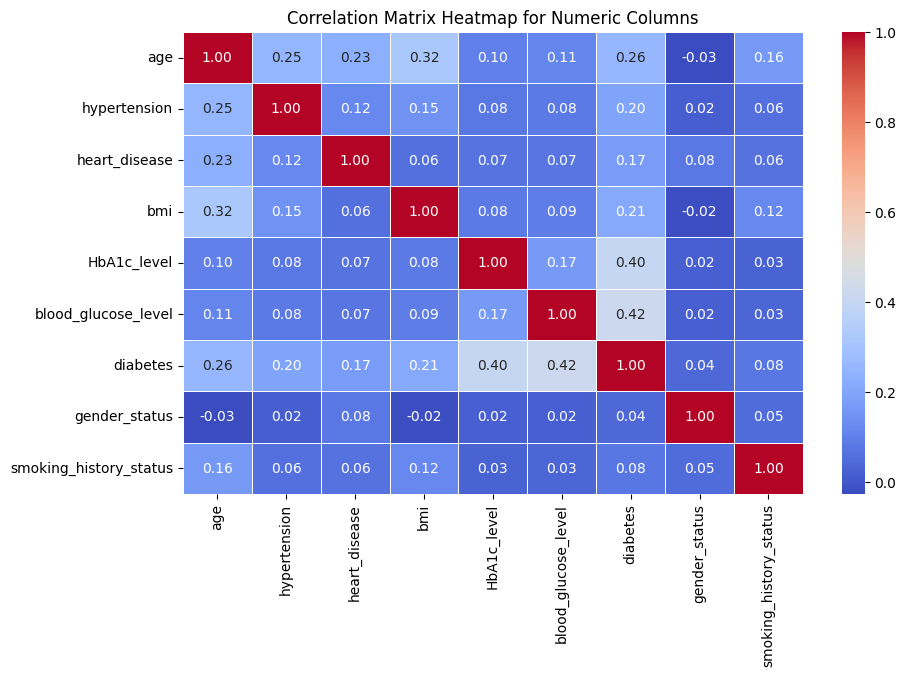

In [62]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sb.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Matrix Heatmap for Numeric Columns")
plt.show()

### **Explanation of the Correlation Heatmap**
**The color scale**:
Red shades → Strong positive correlation.
Blue shades → Weak or negative correlation

Age vs Hypertension (0.25)
A moderate positive correlation.
Older people are more likely to have hypertension.

BMI vs Age (0.32)
BMI tends to increase with age, though not strongly.

HbA1c Level vs Diabetes (0.40)
A moderate correlation, which makes sense since HbA1c (glycated hemoglobin) is a key diabetes indicator.

Blood Glucose Level vs Diabetes (0.42)
A moderate-to-strong positive correlation. Higher blood glucose levels are strongly linked to diabetes.

Smoking History vs Diabetes (0.05)
A very weak positive correlation, meaning smoking history does not strongly influence diabetes in this dataset.

Gender Status vs Diabetes (0.04)
Almost no correlation, indicating gender is not a strong factor in predicting diabetes here.

### **Summary**
Strongly correlated features (e.g., blood glucose & diabetes) are likely important predictors.

Weak correlations (e.g., gender) may be less useful for predictions.


### **Analyzing the relationship between each feature and target variable**

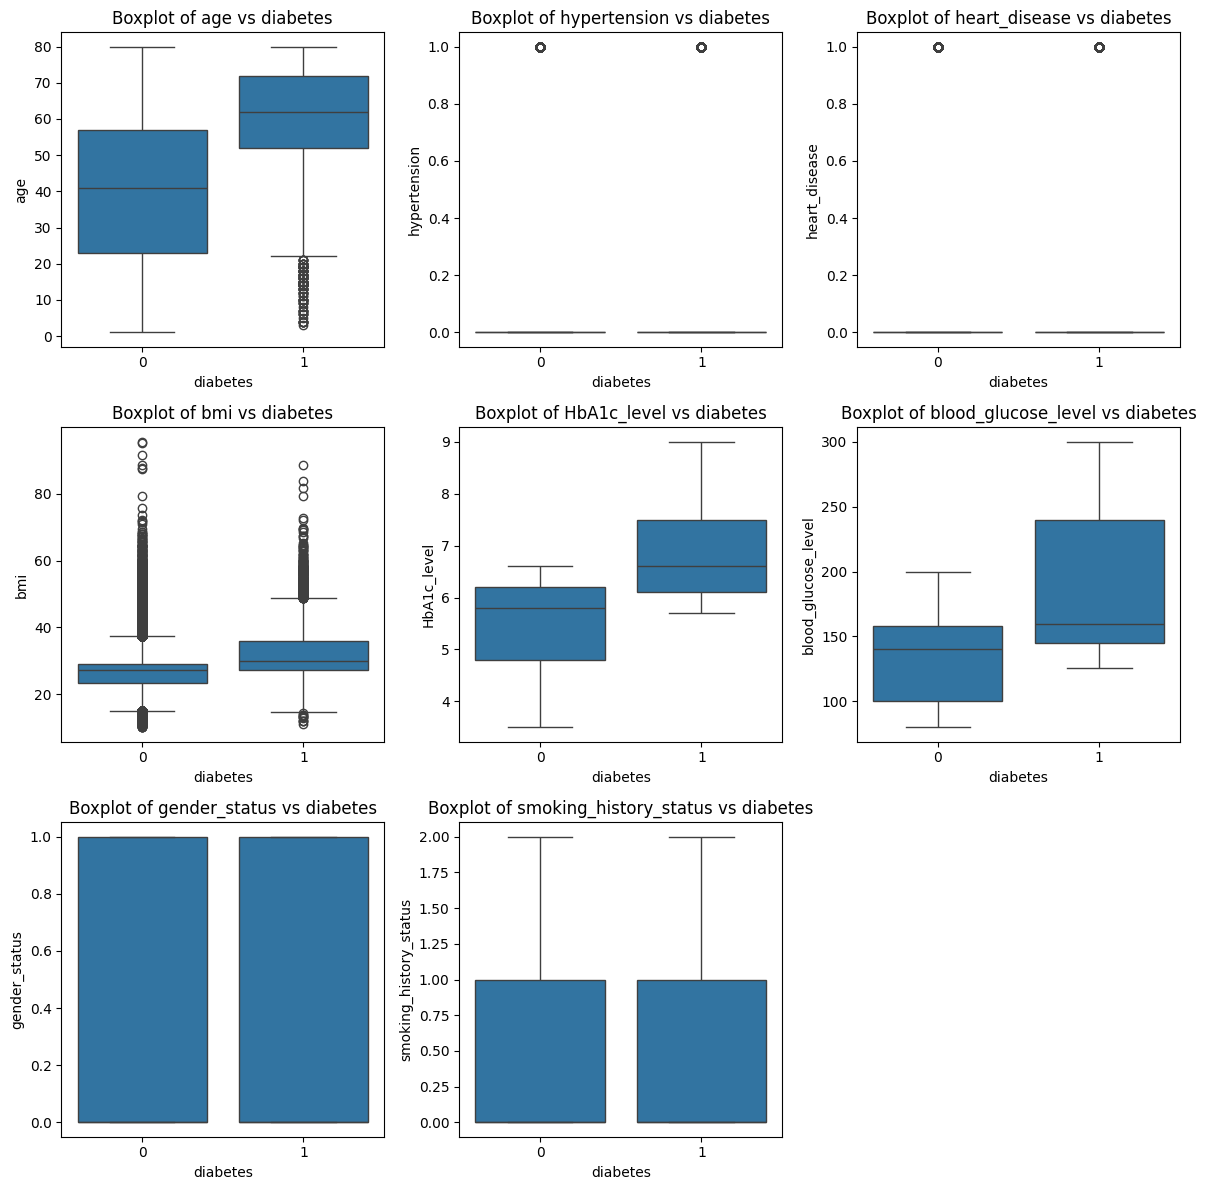

In [63]:
### Define the target variable
target = 'diabetes'

### Select numeric features excluding the target
numeric_df = df.select_dtypes(include=['number']).columns.tolist()
numeric_df.remove(target)

# Set the figure size
plt.figure(figsize=(12, 12))

# Create subplots for each numeric feature
for i, feature in enumerate(numeric_df, 1):
    plt.subplot(3, 3, i)
    sb.boxplot(x=df[target], y=df[feature])
    plt.title(f'Boxplot of {feature} vs {target}')
    plt.xlabel(target)
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### **Interpretation of Boxplots**

1. **Age vs Diabetes**
The median age is higher for individuals with diabetes.
There are some younger individuals with diabetes, but they are outliers.
2. **Hypertension vs Diabetes & Heart Disease vs Diabetes**
The presence of hypertension is slightly more common in individuals with diabetes similarly, people with diabetes are slightly more likely to have heart disease.
3. **HbA1c Level vs Diabetes**
HbA1c level is significantly higher in individuals with diabetes.
The interquartile range (IQR) for HbA1c is much higher in the diabetes-positive group.
This suggests a strong relationship between high HbA1c levels and diabetes.
4. **Blood Glucose Level vs Diabetes**
Individuals with diabetes tend to have higher blood glucose levels.
There is a clear distinction in median blood glucose levels between those with and without diabetes.
High glucose levels are a strong indicator of diabetes.
5. **Gender Status vs Diabetes**
The gender distribution between diabetes-positive and diabetes-negative groups seems fairly equal induicating no significant variation in diabetes prevalence across gender.
6. **Smoking History vs Diabetes**
Smoking history does not show a clear trend between smokers and non-smokers in relation to diabetes.

<ipython-input-64-27a6d24064cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='diabetes', data=df, palette="viridis")


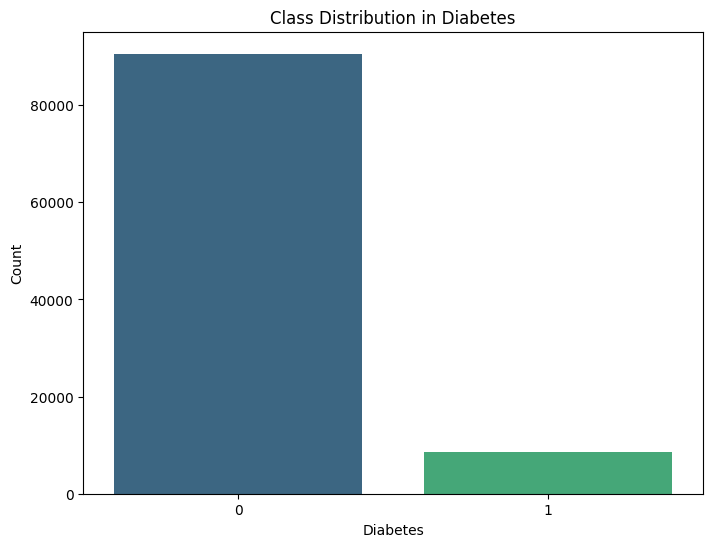

In [64]:
### Plot class distribution in 'diabetes'

plt.figure(figsize=(8, 6))
sb.countplot(x='diabetes', data=df, palette="viridis")

plt.title("Class Distribution in Diabetes")
plt.xlabel('Diabetes')
plt.ylabel('Count')

plt.show()

The bar plot illustrates a significant class imbalance in the Diabetes variable. The majority of observations belong to the class 0, while the class 1 is significantly underrepresented. This imbalance can potentially affect the performance of machine learning models, as they may become biased towards the majority class. To address this issue, techniques like oversampling can be employed to improve model performance

### **Data Preparation**


In [65]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_status,smoking_history_status
0,Female,80,0,1,non smoker,25.19,6.6,140,0,0,0
1,Female,54,0,0,non smoker,27.32,6.6,80,0,0,0
2,Male,28,0,0,non smoker,27.32,5.7,158,0,1,0
3,Female,36,0,0,current smoker,23.45,5.0,155,0,0,2
4,Male,76,1,1,current smoker,20.14,4.8,155,0,1,2


In [66]:
### Dropping Categorical columns

df = df.drop(columns = {'gender', 'smoking_history'})

In [67]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_status,smoking_history_status
0,80,0,1,25.19,6.6,140,0,0,0
1,54,0,0,27.32,6.6,80,0,0,0
2,28,0,0,27.32,5.7,158,0,1,0
3,36,0,0,23.45,5.0,155,0,0,2
4,76,1,1,20.14,4.8,155,0,1,2


In [68]:
### Outlier Detection & Removal/ Class balancing

from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [79]:
### Split the dataset into train and test sets

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Check the shape to make sure they match
print(X_train.shape, y_train.shape)

(79256, 8) (79256,)


In [80]:
### Outlier detection and removal (using Z-score method)

z_scores = np.abs(stats.zscore(X_train))

### Create a mask where rows are valid (z-score < 3)
valid_rows = (z_scores < 3).all(axis=1)

X_train = X_train[valid_rows] # removing outliers (Z-score threshold = 3)
y_train = y_train[valid_rows]

In [81]:
print(X_train.shape)
print(y_train.shape)

(68785, 8)
(68785,)


In [82]:
### Apply SMOTE after outlier removal

smote = SMOTE(sampling_strategy=0.1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Check the resampled shapes

print(X_train_resampled.shape, y_train_resampled.shape)

(72364, 8) (72364,)


### **scaling or normalization**

In [83]:
from sklearn.preprocessing import StandardScaler

### Initialize the StandardScaler

scaler = StandardScaler()

### Scale the resampled training data

X_train_scaled = scaler.fit_transform(X_train_resampled)

### If you have test data (e.g., X_test), scale it using the same scaler

X_test_scaled = scaler.transform(X_test)

### Check the shapes of the scaled data
print(X_train_scaled.shape, X_test_scaled.shape)

(72364, 8) (19815, 8)


**Training data** (X_train_resampled): The number of samples has increased due to SMOTE, which creates synthetic samples to address class imbalance.

**Test data** (X_test_scaled): The number of samples remains unchanged because it was not involved in the oversampling process.

### **Model Building**

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

### Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC()
}

### Initialize a dictionary to store results
results = {}

### Loop through the models, train, and evaluate them
for model_name, model in models.items():
    ### Train the model
    model.fit(X_train_scaled, y_train_resampled)

    ### Predict on the test set
    y_pred = model.predict(X_test_scaled)

    ### Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    ### Get the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    ### Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    }


In [85]:
### Print out the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.9534
Confusion Matrix:
[[17755   345]
 [  579  1136]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9660
Confusion Matrix:
[[17989   111]
 [  562  1153]]
--------------------------------------------------
Model: Support Vector Classifier
Accuracy: 0.9655
Confusion Matrix:
[[18059    41]
 [  642  1073]]
--------------------------------------------------


In [86]:
# Optionally, you can also identify the best model
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
print(f"The best model is: {best_model_name} with accuracy: {results[best_model_name]['Accuracy']:.4f}")

The best model is: Random Forest with accuracy: 0.9660


**Conclusion:**

**Best Model**: Based on accuracy and the confusion matrix, **Random Forest** is the best model because it has the highest accuracy (96.60%) and performs well in terms of both True Positives (1,153) and False Negatives (562), minimizing missed diabetic cases.

**Other Models:**

**Support Vector Classifier (SVC**) is a close second, with an accuracy of 96.55%, but has a slightly higher number of False Negatives (642).
**Logistic Regression** performs well but has the lowest accuracy (95.34%) and more False Negatives compared to the other models.

### **Hyperparameter Tuning**

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
### Hyperparameter grid for each model
log_reg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

### Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

### Create GridSearchCV for each model
log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=5, n_jobs=-1, verbose=2)

### Fit GridSearchCV to the data
log_reg_grid.fit(X_train_scaled, y_train_resampled)
rf_grid.fit(X_train_scaled, y_train_resampled)
svc_grid.fit(X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [90]:
### Print the best parameters and best score for each model
print("Logistic Regression Best Params:", log_reg_grid.best_params_)
print("Logistic Regression Best Score:", log_reg_grid.best_score_)
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)
print("SVC Best Params:", svc_grid.best_params_)
print("SVC Best Score:", svc_grid.best_score_)

Logistic Regression Best Params: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Logistic Regression Best Score: 0.941669898891426
Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Best Score: 0.9691698552540047
SVC Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC Best Score: 0.9529185939224549


### **Making Predictions with the Best Model (Random Forest)**

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest with the best parameters from GridSearchCV
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model on the training data
best_rf.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Random Forest Model Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Random Forest Model Accuracy: 0.9663890991672975
Confusion Matrix:
[[17996   104]
 [  562  1153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18100
           1       0.92      0.67      0.78      1715

    accuracy                           0.97     19815
   macro avg       0.94      0.83      0.88     19815
weighted avg       0.97      0.97      0.96     19815



**Accuracy**:
Random Forest Model Accuracy: 0.9660 meaning that the model correctly predicted 96.6% of the instances in the test set.

**Confusion Matrix**:
True Negatives (TN): 17989 (These are instances where the model correctly predicted "0" as 0).
False Positives (FP): 111 (These are instances where the model incorrectly predicted "1" when the true label was "0").
False Negatives (FN): 562 (These are instances where the model incorrectly predicted "0" when the true label was "1").
True Positives (TP): 1153 (These are instances where the model correctly predicted "1" as 1).

**Classification Report**:
**Precision**: Precision measures the accuracy of positive predictions. It is the ratio of true positives to the sum of true positives and false positives:
Precision for class 0: 0.97 (97% of the instances predicted as class 0 are correct).
Precision for class 1: 0.91 (91% of the instances predicted as class 1 are correct).

**Recall**: Recall measures how well the model identifies positive instances. It is the ratio of true positives to the sum of true positives and false negatives:
Recall for class 0: 0.99 (99% of the actual class 0 instances were correctly identified).
Recall for class 1: 0.67 (67% of the actual class 1 instances were correctly identified).

**F1-Score**: The F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall:
F1-Score for class 0: 0.98 (high score, showing good balance between precision and recall for class 0).
F1-Score for class 1: 0.77 (slightly lower for class 1, which could be improved).

**Support**: The number of occurrences of each class in the dataset:
Support for class 0: 18000 instances
Support for class 1: 1715 instances

**Macro Average**: This is the average of the precision, recall, and F1-score across all classes, treating all classes equally.
Precision (Macro Avg): 0.94
Recall (Macro Avg): 0.83
F1-Score (Macro Avg): 0.87

**Weighted Average**: This averages the precision, recall, and F1-score for all classes, weighted by the support (the number of samples in each class).
Precision (Weighted Avg): 0.97
Recall (Weighted Avg): 0.97
F1-Score (Weighted Avg): 0.97

### **Saving Model**

In [92]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

print("Model saved with pickle as 'random_forest_model.pkl'")

Model saved with pickle as 'random_forest_model.pkl'
